# APPLIED MACHINE LEARNING ASSIGNMENT 2

Lecturer's Name: Paul <br />
Student Name: Yap Li Xen (Kelvin) <br />
Student ID: P7414389 <br />
Class: DSAI/2021

# PART B: DEEP LEARNING

### Contents
1. Data Preparation <br />
2. Image Classification with Keras (Basic Neural Network) <br />
3. Image Classification with Keras (Convolutional Neural Network) <br />
    i) Deep Learning Process (Simple CNN) <br />
    ii) Deep Learning Process (CNN - Going Deeper) <br />

Data Preparation
==============

### Understand Dataset
Dataset from tf.keras.datasets.fashion_mnist.load_data()

![](image\classes.png)

### Import Dataset
Import dataset from Tensorflow Keras libraries (fashion_mnist) and split into Train dataset (X_train, y_train) and Test dataset (X_test, y_test).

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Randomly select few images from the dataset (X_train) to have a view of the images

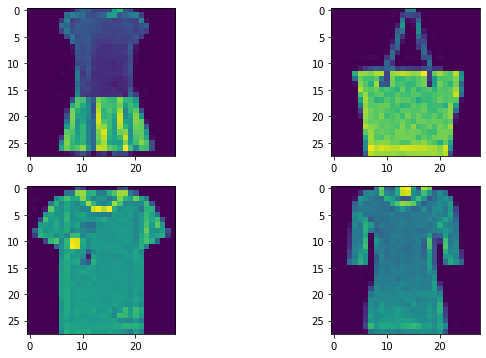

In [2]:
plt.figure(figsize=(10,6))

for i in range(221, 225, 1):
    plt.subplot(i)
    plt.imshow(X_train[np.random.randint(0, 60000)])
plt.show()

Randomly select few images from the dataset (X_test) to have a view of the images

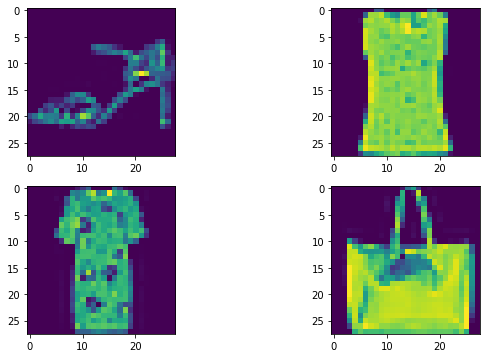

In [3]:
plt.figure(figsize=(10,6))

for i in range(221, 225, 1):
    plt.subplot(i)
    plt.imshow(X_test[np.random.randint(0, 10000)])
plt.show()

Image Classification with Keras (Basic Neural Network)
=============================================

### Data Import
Import fresh data

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Data Reshaping
The original image pixel is 28*28, reshaping (Flatten) data to 784 vector for each image

In [5]:
print("X_train Shape (Before): {}".format(X_train.shape))
print("X_test Shape (Before): {}".format(X_test.shape))

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

print("X_train Shape (After): {}".format(X_train.shape))
print("X_test Shape (After): {}".format(X_test.shape))

X_train Shape (Before): (60000, 28, 28)
X_test Shape (Before): (10000, 28, 28)
X_train Shape (After): (60000, 784)
X_test Shape (After): (10000, 784)


### Data Scaling
Normalize inputs from 0-255 to 0-1

In [6]:
X_train = X_train / 255
X_test = X_test / 255

### Data Encoding
Execute One Hot Encoding

In [7]:
from tensorflow.keras.utils import to_categorical

print("y_train Shape (Before): {}".format(y_train.shape))
print("y_test Shape (Before): {}".format(y_test.shape))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("y_train Shape (After): {}".format(y_train.shape))
print("y_test Shape (After): {}".format(y_test.shape))

y_train Shape (Before): (60000,)
y_test Shape (Before): (10000,)
y_train Shape (After): (60000, 10)
y_test Shape (After): (10000, 10)


### Deep Learning Process
Train, Compile and Evaluate Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
model1.add(Dense(784, input_shape=(784,), activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

training = model1.fit(X_train, y_train, 
                      validation_split=0.2, 
                      batch_size=100, 
                      verbose=2, 
                      epochs=20)

print(model1.summary())

Epoch 1/20
480/480 - 4s - loss: 0.5065 - accuracy: 0.8234 - val_loss: 0.4102 - val_accuracy: 0.8537
Epoch 2/20
480/480 - 3s - loss: 0.3742 - accuracy: 0.8664 - val_loss: 0.4086 - val_accuracy: 0.8540
Epoch 3/20
480/480 - 4s - loss: 0.3306 - accuracy: 0.8787 - val_loss: 0.3849 - val_accuracy: 0.8656
Epoch 4/20
480/480 - 3s - loss: 0.3077 - accuracy: 0.8874 - val_loss: 0.3258 - val_accuracy: 0.8826
Epoch 5/20
480/480 - 3s - loss: 0.2876 - accuracy: 0.8932 - val_loss: 0.3283 - val_accuracy: 0.8796
Epoch 6/20
480/480 - 3s - loss: 0.2699 - accuracy: 0.8996 - val_loss: 0.3231 - val_accuracy: 0.8841
Epoch 7/20
480/480 - 3s - loss: 0.2562 - accuracy: 0.9042 - val_loss: 0.3308 - val_accuracy: 0.8783
Epoch 8/20
480/480 - 3s - loss: 0.2433 - accuracy: 0.9106 - val_loss: 0.3171 - val_accuracy: 0.8867
Epoch 9/20
480/480 - 3s - loss: 0.2336 - accuracy: 0.9129 - val_loss: 0.3112 - val_accuracy: 0.8898
Epoch 10/20
480/480 - 3s - loss: 0.2254 - accuracy: 0.9156 - val_loss: 0.3101 - val_accuracy: 0.8919

In [9]:
score = model1.evaluate(X_test, y_test)
print(score)
print("Score (Accuracy): {:.2f}%".format(score[1]*100))
print("Score (Error): {:.2f}%".format(100-score[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.3596 - accuracy: 0.8858
[0.3596430718898773, 0.8858000040054321]
Score (Accuracy): 88.58%
Score (Error): 11.42%


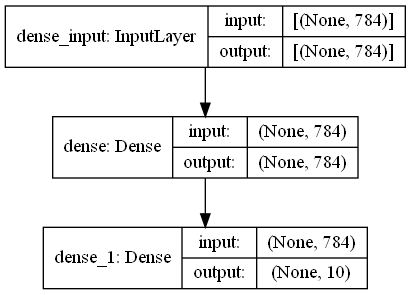

In [10]:
from keras.utils.vis_utils import plot_model

plot_model(model1, to_file="image\model1_plot.png", show_shapes=True, show_layer_names=True)

### Learning Curve
To track the machine learning performance and identify under-fitting/over-fitting (if any)

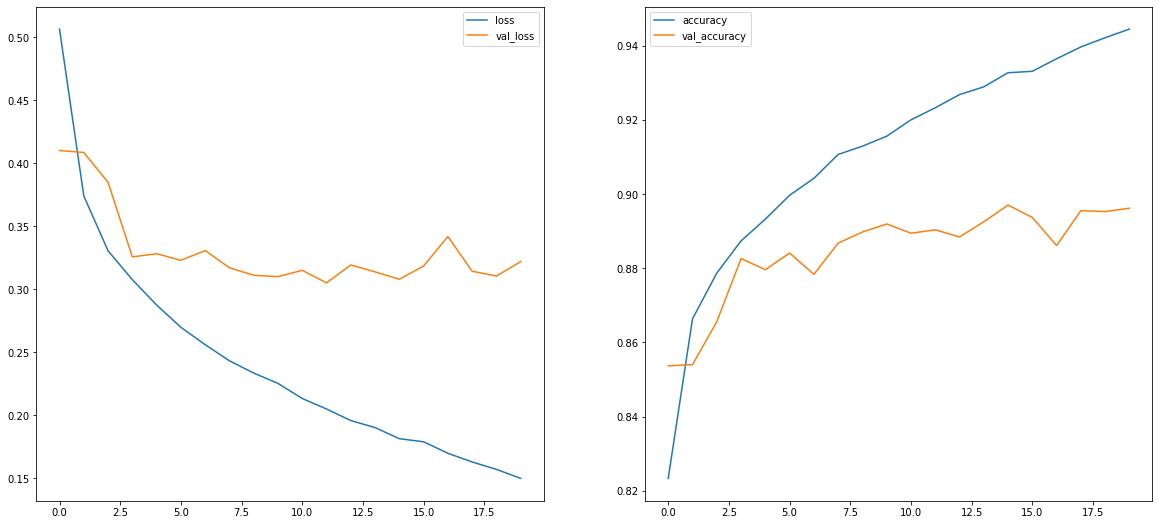

In [11]:
history = training.history

plt.figure(figsize=(20,20))

plt.subplot(221)
plt.plot(history['loss'], label="loss")
plt.plot(history['val_loss'], label="val_loss")
plt.legend(loc='best')

plt.subplot(222)
plt.plot(history['accuracy'], label="accuracy")
plt.plot(history['val_accuracy'], label="val_accuracy")
plt.legend(loc='best')

plt.show()

### Confusion Matrix
Use Confusion Matrix to evaluate results

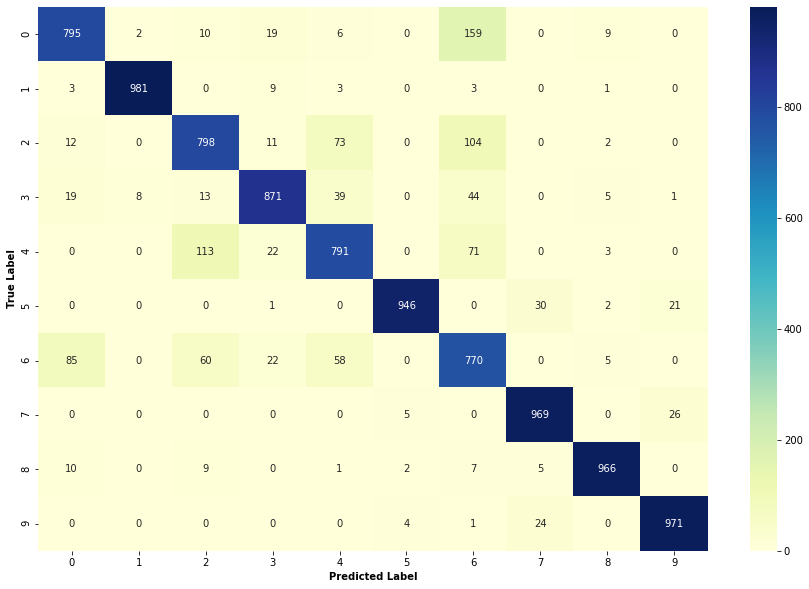

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_predict = model1.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))

plt.figure(figsize=(15,10))
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt='g', 
            xticklabels=range(0,10),
            yticklabels=range(0,10))

plt.xlabel("Predicted Label", fontweight="bold")
plt.ylabel("True Label", fontweight="bold")
plt.show()

Image Classification with Keras (Convolutional Neural Network)
====================================================

### Data Import
Import fresh data

In [13]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Data Reshaping
This is to resolve different data shape (eg: channel first/last) issue.

In [14]:
from tensorflow.keras import backend as K

print("X_train Shape (Before): {}".format(X_train.shape))
print("X_test Shape (Before): {}".format(X_test.shape))

if K.image_data_format() == 'channels_first':
    print("channels_first")
    # reshape to be [samples][pixels][rows][columns]
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
    inputShape = (1,28,28)
else:
    print('channels_last')
    # reshape to be [samples][rows][columns][pixels]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    inputShape = (28,28,1)

print("X_train Shape (After): {}".format(X_train.shape))
print("X_test Shape (After): {}".format(X_test.shape))

X_train Shape (Before): (60000, 28, 28)
X_test Shape (Before): (10000, 28, 28)
channels_last
X_train Shape (After): (60000, 28, 28, 1)
X_test Shape (After): (10000, 28, 28, 1)


### Data Scaling
Normalize inputs from 0-255 to 0-1

In [15]:
X_train = X_train / 255
X_test = X_test / 255

### Data Encoding
Execute One Hot Encoding

In [16]:
from tensorflow.keras.utils import to_categorical

print("y_train Shape (Before): {}".format(y_train.shape))
print("y_test Shape (Before): {}".format(y_test.shape))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("y_train Shape (After): {}".format(y_train.shape))
print("y_test Shape (After): {}".format(y_test.shape))

y_train Shape (Before): (60000,)
y_test Shape (Before): (10000,)
y_train Shape (After): (60000, 10)
y_test Shape (After): (10000, 10)


### Deep Learning Process (Simple CNN)
Train, Compile and Evaluate Model
1 layer of Conv2D

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization

model2 = Sequential()
model2.add(Conv2D(50, kernel_size=3, input_shape=inputShape, activation='relu'))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

training = model2.fit(X_train, y_train, 
                      validation_split=0.2, 
                      batch_size=100, 
                      verbose=2, 
                      epochs=10)

print(model2.summary())

Epoch 1/10
480/480 - 11s - loss: 0.4728 - accuracy: 0.8340 - val_loss: 0.3603 - val_accuracy: 0.8732
Epoch 2/10
480/480 - 11s - loss: 0.3197 - accuracy: 0.8865 - val_loss: 0.3141 - val_accuracy: 0.8888
Epoch 3/10
480/480 - 11s - loss: 0.2744 - accuracy: 0.9009 - val_loss: 0.3022 - val_accuracy: 0.8931
Epoch 4/10
480/480 - 11s - loss: 0.2455 - accuracy: 0.9125 - val_loss: 0.2917 - val_accuracy: 0.9001
Epoch 5/10
480/480 - 11s - loss: 0.2240 - accuracy: 0.9213 - val_loss: 0.2956 - val_accuracy: 0.8963
Epoch 6/10
480/480 - 11s - loss: 0.2063 - accuracy: 0.9260 - val_loss: 0.2956 - val_accuracy: 0.8983
Epoch 7/10
480/480 - 12s - loss: 0.1929 - accuracy: 0.9324 - val_loss: 0.2864 - val_accuracy: 0.9015
Epoch 8/10
480/480 - 11s - loss: 0.1805 - accuracy: 0.9366 - val_loss: 0.2893 - val_accuracy: 0.9025
Epoch 9/10
480/480 - 11s - loss: 0.1698 - accuracy: 0.9396 - val_loss: 0.2871 - val_accuracy: 0.9020
Epoch 10/10
480/480 - 11s - loss: 0.1576 - accuracy: 0.9445 - val_loss: 0.2933 - val_accura

In [18]:
score = model2.evaluate(X_test, y_test)
print(score)
print("Score (Accuracy): {:.2f}%".format(score[1]*100))
print("Score (Error): {:.2f}%".format(100-score[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.3104 - accuracy: 0.8954
[0.3104390501976013, 0.8953999876976013]
Score (Accuracy): 89.54%
Score (Error): 10.46%


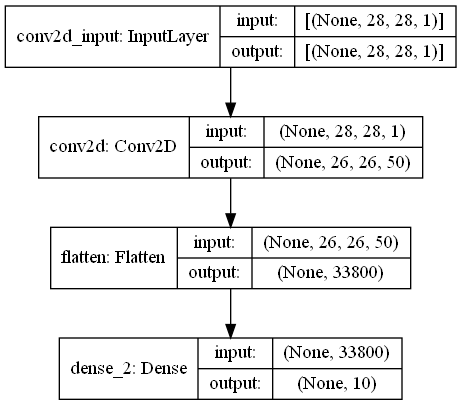

In [19]:
from keras.utils.vis_utils import plot_model

plot_model(model2, to_file="image\model2_plot.png", show_shapes=True, show_layer_names=True)

### Learning Curve
To track the machine learning performance and identify under-fitting/over-fitting (if any)

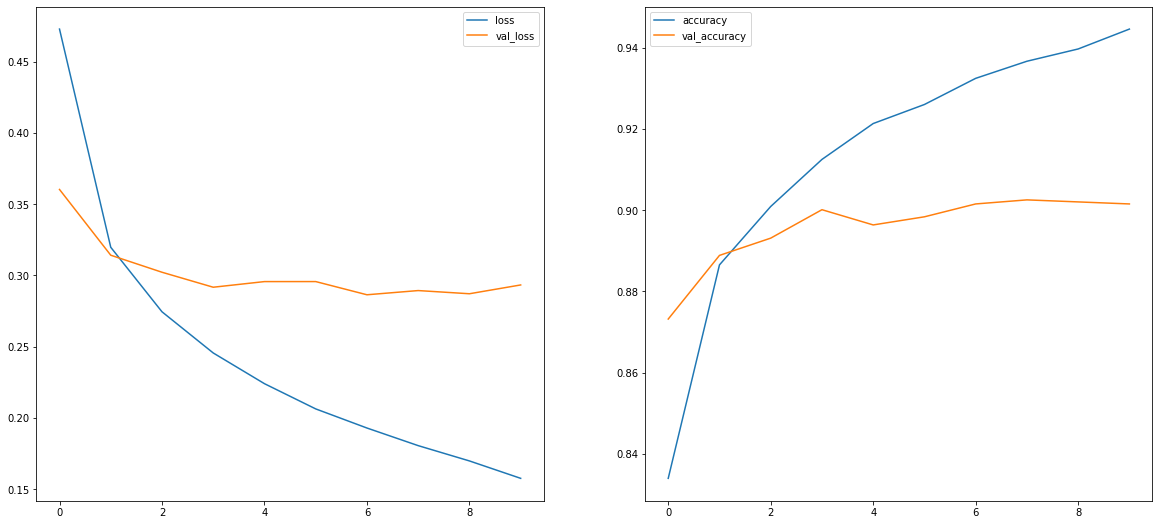

In [20]:
history = training.history

plt.figure(figsize=(20,20))

plt.subplot(221)
plt.plot(history['loss'], label="loss")
plt.plot(history['val_loss'], label="val_loss")
plt.legend(loc='best')

plt.subplot(222)
plt.plot(history['accuracy'], label="accuracy")
plt.plot(history['val_accuracy'], label="val_accuracy")
plt.legend(loc='best')

plt.show()

### Confusion Matrix
Use Confusion Matrix to evaluate results

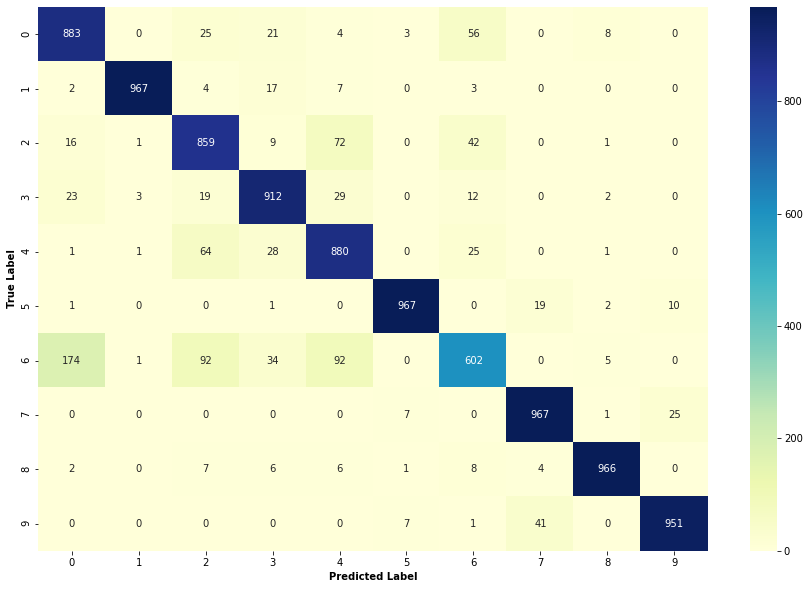

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_predict = model2.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))

plt.figure(figsize=(15,10))
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt='g', 
            xticklabels=range(0,10),
            yticklabels=range(0,10))

plt.xlabel("Predicted Label", fontweight="bold")
plt.ylabel("True Label", fontweight="bold")
plt.show()

### Deep Learning Process (CNN - Going Deeper)
Train, Compile and Evaluate Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization

model3 = Sequential()

model3.add(Conv2D(50, kernel_size=3, input_shape=inputShape, activation='relu'))
model3.add(MaxPool2D(2))
model3.add(BatchNormalization())
model3.add(Conv2D(25, kernel_size=3, input_shape=inputShape, activation='relu'))
model3.add(MaxPool2D(2))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

training = model3.fit(X_train, y_train, 
                      validation_split=0.2, 
                      batch_size=100, 
                      verbose=2, 
                      epochs=10)

print(model3.summary())

Epoch 1/10
480/480 - 29s - loss: 0.4374 - accuracy: 0.8401 - val_loss: 0.5411 - val_accuracy: 0.8687
Epoch 2/10
480/480 - 28s - loss: 0.2977 - accuracy: 0.8889 - val_loss: 0.3192 - val_accuracy: 0.8815
Epoch 3/10
480/480 - 28s - loss: 0.2579 - accuracy: 0.9035 - val_loss: 0.3099 - val_accuracy: 0.8857
Epoch 4/10
480/480 - 30s - loss: 0.2277 - accuracy: 0.9155 - val_loss: 0.2796 - val_accuracy: 0.9021
Epoch 5/10
480/480 - 30s - loss: 0.2043 - accuracy: 0.9241 - val_loss: 0.2797 - val_accuracy: 0.8997
Epoch 6/10
480/480 - 28s - loss: 0.1825 - accuracy: 0.9317 - val_loss: 0.2811 - val_accuracy: 0.9013
Epoch 7/10
480/480 - 28s - loss: 0.1665 - accuracy: 0.9372 - val_loss: 0.2697 - val_accuracy: 0.9021
Epoch 8/10
480/480 - 28s - loss: 0.1515 - accuracy: 0.9429 - val_loss: 0.2868 - val_accuracy: 0.9045
Epoch 9/10
480/480 - 28s - loss: 0.1304 - accuracy: 0.9506 - val_loss: 0.3302 - val_accuracy: 0.8929
Epoch 10/10
480/480 - 28s - loss: 0.1211 - accuracy: 0.9539 - val_loss: 0.3069 - val_accura

In [23]:
score = model3.evaluate(X_test, y_test)
print(score)
print("Score (Accuracy): {:.2f}%".format(score[1]*100))
print("Score (Error): {:.2f}%".format(100-score[1]*100))

313/313 [==============================] - 2s 7ms/step - loss: 0.3130 - accuracy: 0.9050
[0.31300634145736694, 0.9049999713897705]
Score (Accuracy): 90.50%
Score (Error): 9.50%


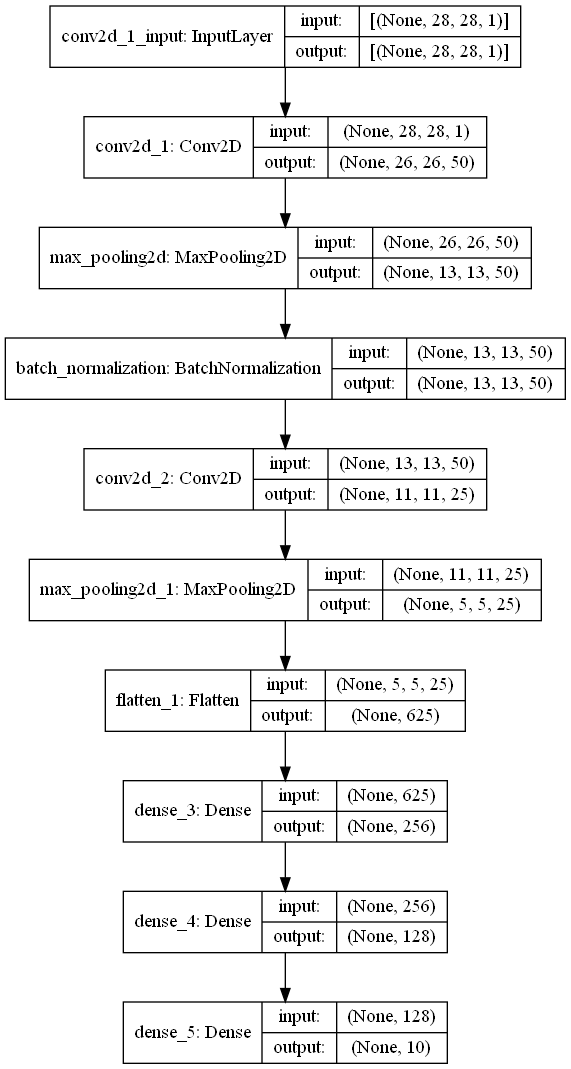

In [24]:
from keras.utils.vis_utils import plot_model

plot_model(model3, to_file="image\model3_plot.png", show_shapes=True, show_layer_names=True)

### Learning Curve
To track the machine learning performance and identify under-fitting/over-fitting (if any)

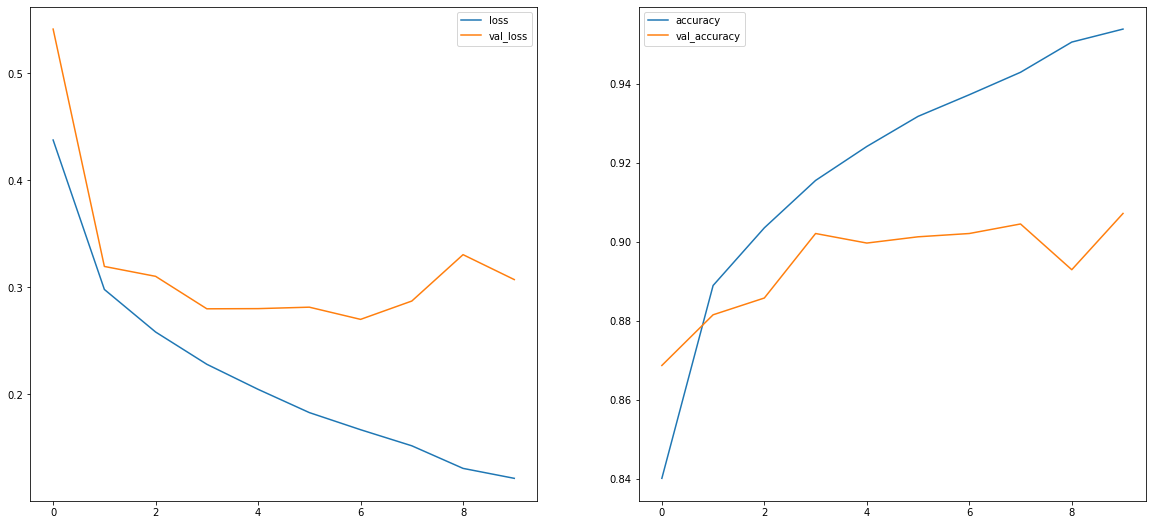

In [25]:
history = training.history

plt.figure(figsize=(20,20))

plt.subplot(221)
plt.plot(history['loss'], label="loss")
plt.plot(history['val_loss'], label="val_loss")
plt.legend(loc='best')

plt.subplot(222)
plt.plot(history['accuracy'], label="accuracy")
plt.plot(history['val_accuracy'], label="val_accuracy")
plt.legend(loc='best')

plt.show()

### Confusion Matrix
Use Confusion Matrix to evaluate results

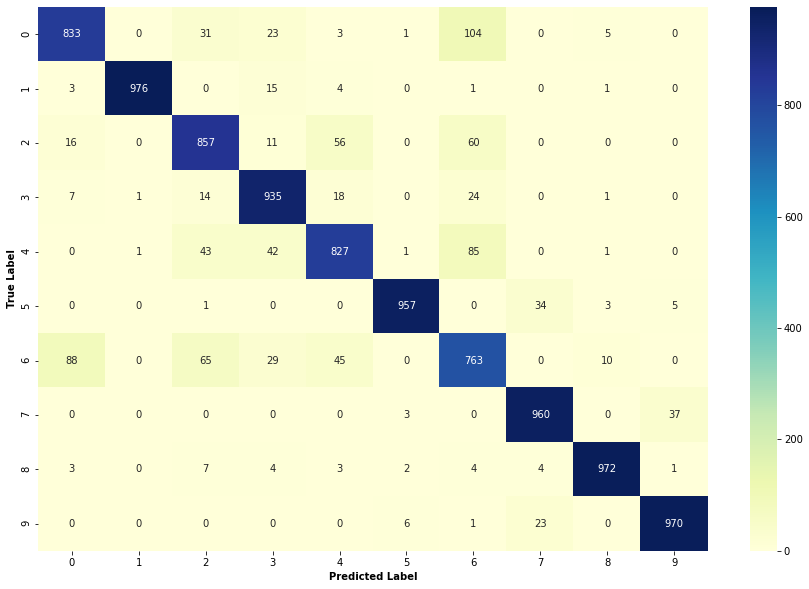

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_predict = model3.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))

plt.figure(figsize=(15,10))
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt='g', 
            xticklabels=range(0,10),
            yticklabels=range(0,10))

plt.xlabel("Predicted Label", fontweight="bold")
plt.ylabel("True Label", fontweight="bold")
plt.show()